In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import h5py
from scipy.interpolate import CubicSpline
from scipy.io import savemat
from scipy.interpolate import interp1d
from collections import OrderedDict
%matplotlib inline

In [2]:
df = pd.read_parquet("ASMS-nodes.parquet")
df

,S1,S2,S3,S4,S5,S6,S7
0,"[-0.03639629823712, 0.363365523203351, 0.00944...","[-0.5034526715110165, -0.009802872414338193, 0...","[-0.036396298237072994, 0.36336552320324766, 0...","[-0.5034526715111739, -0.009802872414821187, 0...","[-0.03639629823719279, 0.36336552320324716, 0....","[-0.50345267151135, -0.009802872414010233, 0.0...","[0.309860148703232, 0.2001289024144926, 0.0111..."
1,"[0.125366029263795, -0.38030901219380103, 0.01...","[-0.5027962964556788, 0.026548711257379204, 0....","[0.12536602926385115, -0.3803090121939021, 0.0...","[-0.5027962964558499, 0.026548711256896135, 0....","[0.12536602926372917, -0.38030901219390206, 0....","[-0.5027962964560037, 0.026548711257706387, 0....","[0.222725179324661, -0.29403806527514276, 0.01..."
2,"[-0.31602207203862, 0.24499424739325049, 0.012...","[-0.5014842787485148, -0.04610705835327708, 0....","[-0.31602207203857124, 0.24499424739314324, 0....","[-0.5014842787486813, -0.04610705835376142, 0....","[-0.3160220720386931, 0.24499424739314332, 0.0...","[-0.5014842787488606, -0.046107058352951036, 0...","[0.288393980164027, 0.22998652469475944, 0.011..."
3,"[0.31602155815302, 0.2449949092672041, 0.01269...","[-0.49951857561640567, 0.06275817243140552, 0....","[0.3160215581530669, 0.24499490926710454, 0.01...","[-0.4995185756165689, 0.06275817243092197, 0.0...","[0.3160215581529466, 0.24499490926710255, 0.01...","[-0.4995185756167104, 0.06275817243173137, 0.0...","[-0.26894593304058, -0.19767455985425264, 0.00..."
4,"[-0.01819920434875, -0.43458247698438285, 0.01...","[-0.49690138045148047, -0.08217457343870466, 0...","[-0.018199204348694903, -0.43458247698448477, ...","[-0.4969013804516348, -0.08217457343918788, 0....","[-0.0181992043488155, -0.43458247698448405, 0....","[-0.4969013804518366, -0.0821745734383898, 0.0...","[-0.20779172659863, 0.3047744866178807, 0.0111..."
...,...,...,...,...,...,...,...
670,"[0.496901570189443, -0.08181493026818662, 0.02...","[0.49690158931219774, -0.08217333989504622, 0....","[0.49690157018949543, -0.08181493026828443, 0....","[0.49690158931204287, -0.08217333989546345, 0....","[0.49690157018937364, -0.08181493026828501, 0....","[0.4969015893118496, -0.08217333989501019, 0.0...","[-0.18256788461425, -0.06318735921214239, -0.0..."
671,"[0.503452695590093, -0.009443037119758902, 0.0...","[0.49951842452227946, 0.06275941247172559, 0.0...","[0.5034526955901436, -0.009443037119855696, 0....","[0.4995184245221135, 0.06275941247130759, 0.02...","[0.5034526955900238, -0.009443037119857722, 0....","[0.4995184245219696, 0.06275941247176084, 0.02...","[0.070913273371028, 0.14119993643538548, -0.00..."
672,"[0.499518433603219, 0.06311817631832842, 0.023...","[0.5014843980319794, -0.04610581343282774, 0.0...","[0.4995184336032663, 0.06311817631823002, 0.02...","[0.5014843980318191, -0.046105813433245546, 0....","[0.49951843360315007, 0.06311817631822905, 0.0...","[0.501484398031637, -0.04610581343279324, 0.02...","[-0.0835311606936, -0.0900251808139016, -0.003..."
673,"[0.460738174452999, 0.20279117846209022, 0.023...","[0.5027962352913223, 0.026549959434658016, 0.0...","[0.4607381744530491, 0.20279117846199182, 0.02...","[0.502796235291159, 0.0265499594342401, 0.0224...","[0.46073817445292686, 0.20279117846199052, 0.0...","[0.5027962352910057, 0.02654995943469224, 0.02...","[0.069180629682761, 0.10146934741151183, -0.00..."


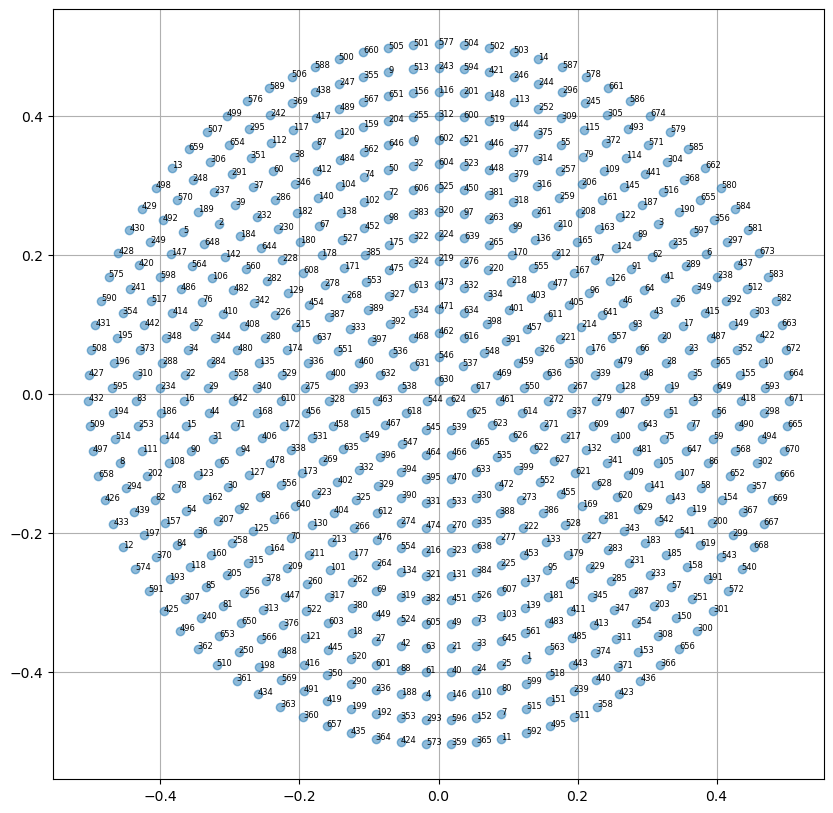

In [3]:
fig,ax = plt.subplots(figsize=(10,10))
i = 1
xyz = np.vstack(df[f'S{i}'])
ax.plot(xyz[:,0],xyz[:,1],'C0o',alpha=0.5)
for i in range(xyz.shape[0]):
    ax.text(xyz[i,0],xyz[i,1],f"{i}",fontdict={"fontsize":6})
o = np.linspace(0,2*np.pi,101)
(xl,yl) = (np.cos(o),np.sin(o))
#D = CEO_KL['outer'].D
#ax.plot(xl*D/2,yl*D/2,"C3")
#D = CEO_KL['center'].D
#ax.plot(xl*D/2,yl*D/2,"C3")
ax.set_aspect('equal')
ax.grid()

In [4]:
df = pd.read_parquet("data.parquet")
df

,VoiceCoilsForces<1,VoiceCoilsMotion<1,FaceSheetFigure<1
0,"[-1.3141544801181517e-05, -1.5813611475282404e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.9531903575342494e-09, -4.84246221432806e-0..."
1,"[0.000547693814706181, 0.001184255915633027, 0...","[-2.263342523914959e-09, -3.885188744056644e-0...","[-4.5573756108660295e-09, -1.0488005652563503e..."
2,"[0.000546466227381905, 0.0013095759393178168, ...","[-5.028591582668322e-09, -8.03869726915142e-09...","[-4.751334980429535e-09, -1.2278124928859247e-..."
3,"[-0.00021197359570167257, 0.000685027124087065...","[-4.997309174324257e-09, -9.164932753097215e-0...","[-3.364649250283486e-09, -6.914489187521314e-0..."
4,"[-0.0005572700321864724, -0.000938663797806591...","[-3.4124490722443767e-09, -4.296132594960429e-...","[-2.376932597737878e-09, 1.1403657234927183e-0..."
...,...,...,...
95,"[-0.00036027696054366233, -0.00026317689474069...","[-6.311663405888403e-10, 8.27718694768907e-10,...","[1.101586702904004e-10, -1.447236064409658e-09..."
96,"[-0.0005194483185086056, 0.0003004358896447245...","[-2.641139901517761e-10, -3.8519521224545853e-...","[1.6375902251472464e-10, -1.9784848407151452e-..."
97,"[-0.0004424136530269634, 8.839191767120369e-05...","[-1.331497205803099e-10, -9.819918260659525e-1...","[-2.341128634587524e-12, -6.545800109148335e-1..."
98,"[-0.000364491264257888, -0.0003863899525348034...","[-3.4533739715031395e-10, 2.722994212138808e-1...","[3.057969451524935e-10, -5.722132508784156e-10..."


Text(0.5, 0, 'Time [ms]')

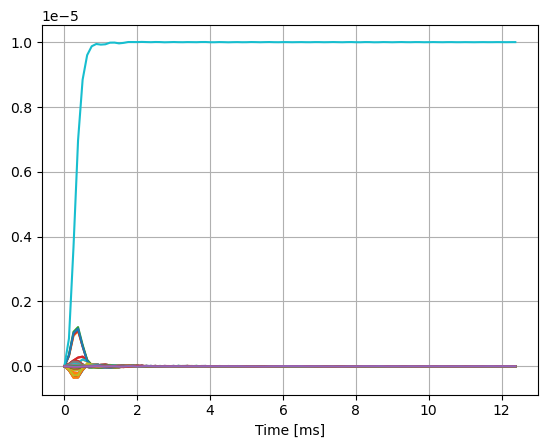

In [5]:
t = 1e3*np.arange(df.shape[0])/8000
actuators = np.vstack(df["VoiceCoilsMotion<1"])
fig,ax = plt.subplots()
ax.plot(t,actuators);
ax.grid()
ax.set_xlabel('Time [ms]')

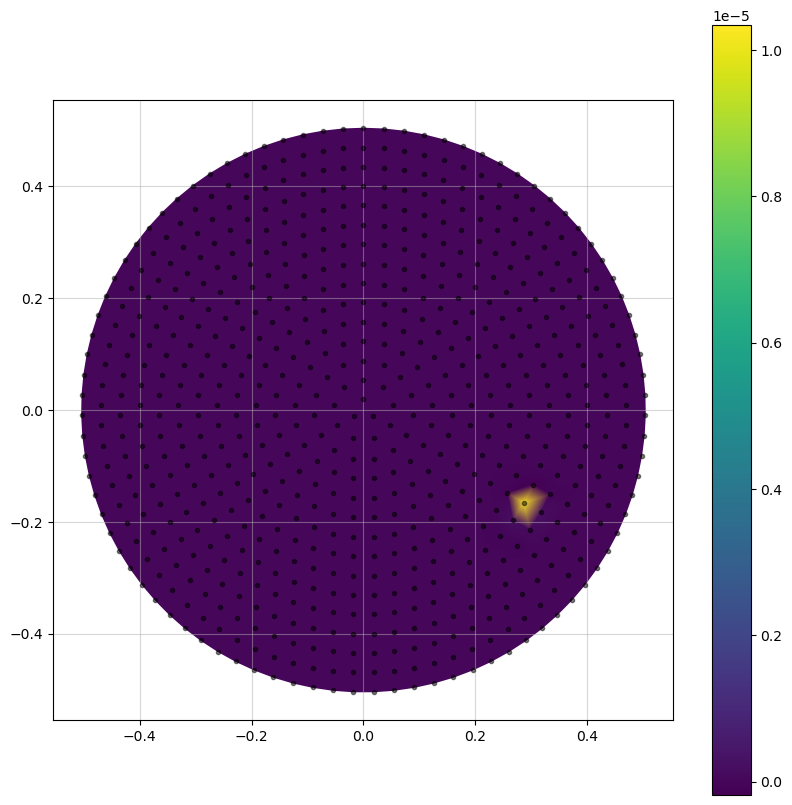

In [6]:
shape = np.vstack(df["FaceSheetFigure<1"])
fig,ax = plt.subplots(figsize=(10,10))
h = ax.tripcolor(xyz[:,0],xyz[:,1],shape[-1,:],shading="gouraud");
ax.plot(xyz[:,0],xyz[:,1],'k.',alpha=0.5)
ax.grid(alpha=0.5)
ax.set_aspect('equal')
fig.colorbar(h,ax=ax)

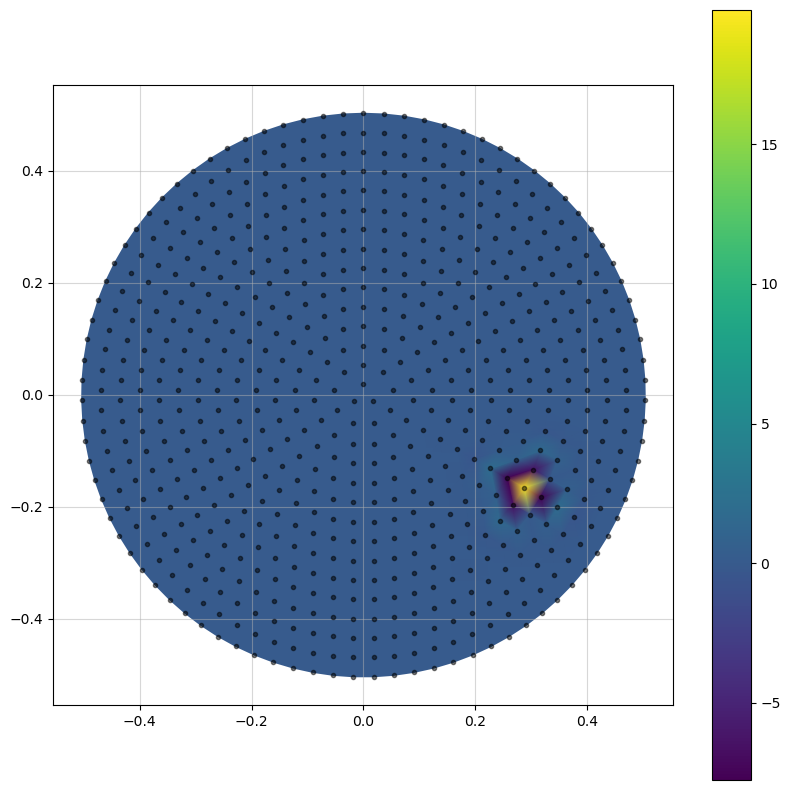

In [7]:
forces = np.vstack(df["VoiceCoilsForces<1"])
fig,ax = plt.subplots(figsize=(10,10))
h = ax.tripcolor(xyz[:,0],xyz[:,1],forces[-1,:],shading="gouraud");
ax.plot(xyz[:,0],xyz[:,1],'k.',alpha=0.5)
ax.grid(alpha=0.5)
ax.set_aspect('equal')
fig.colorbar(h,ax=ax)

In [4]:
df = pd.read_parquet("../ngao-opm/data/data.parquet")
df

,VoiceCoilsForces<7
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
1596,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1597,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1598,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1599,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


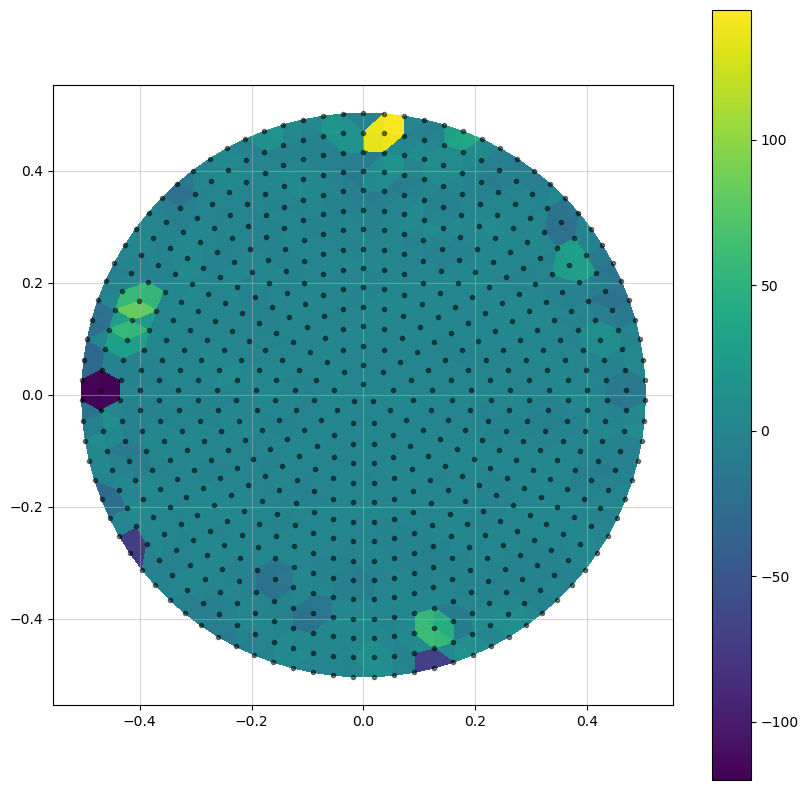

In [16]:
forces = np.vstack(df["VoiceCoilsForces<7"])
fig,ax = plt.subplots(figsize=(10,10))
h = ax.tripcolor(xyz[:,0],xyz[:,1],forces[250,:])#,shading="gouraud");
ax.plot(xyz[:,0],xyz[:,1],'k.',alpha=0.5)
ax.grid(alpha=0.5)
ax.set_aspect('equal')
fig.colorbar(h,ax=ax)

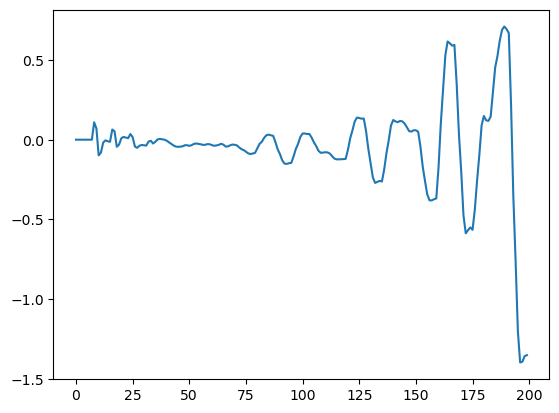

In [15]:
plt.plot(forces[:200,10]);